Filtered Data:
        Month  Income  Expenses  Savings
6  2023-07-01  7300.0      6800    500.0
8  2023-09-01  8100.0      7300    800.0
9  2023-10-01  9000.0      8125    875.0
10 2023-11-01  7900.0      7411    489.0


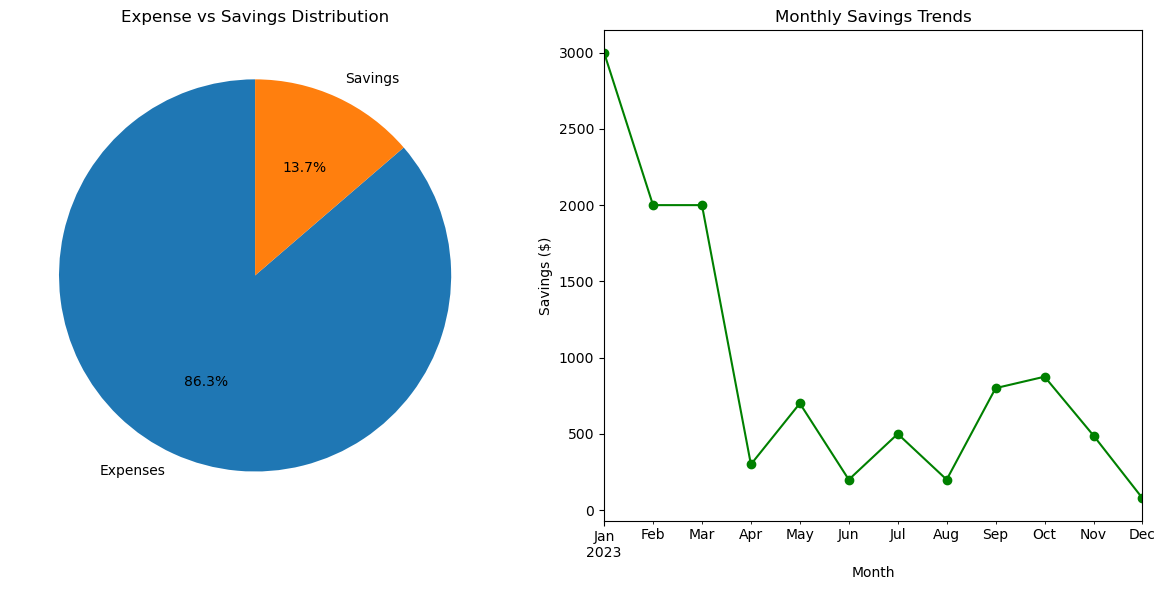

Machine IP: 26.65.80.74
Machine Name: fyc
my name is Colin


In [7]:
# Colin
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import socket
import platform

# Read data from files
income_df = pd.read_excel('income.xlsx')
expenses_df = pd.read_csv('expenses.txt', sep=' ')

# Ensure the 'Month' column is treated as a string and strip any whitespace
income_df['Month'] = pd.to_datetime(income_df['Month'].astype(str).str.strip(), format='%Y-%m-%d', errors='coerce')
expenses_df['Month'] = pd.to_datetime(expenses_df['Month'].astype(str).str.strip(), format='%Y-%m-%d', errors='coerce')

# Check for invalid dates in the data
if income_df['Month'].isna().any():
    print("Warning: Invalid dates found in income data.")
if expenses_df['Month'].isna().any():
    print("Warning: Invalid dates found in expenses data.")

# Merge income and expenses data on the 'Month' column
merged_df = pd.merge(income_df, expenses_df, on='Month', how='inner')

# Calculate savings as the difference between income and expenses
merged_df['Savings'] = merged_df['Income'] - merged_df['Expenses']

# Validate the data
if merged_df['Income'].sum() <= 0:
    raise ValueError("Total income must be greater than zero.")
if merged_df['Expenses'].sum() > merged_df['Income'].sum():
    raise ValueError("Total expenses cannot exceed total income.")

# Calculate the percentage of expenses relative to income
expense_percentage = merged_df['Expenses'].sum() / merged_df['Income'].sum() * 100
labels = ['Expenses', 'Savings']
sizes = [max(0, expense_percentage), max(0, 100 - expense_percentage)]

# Save the merged data to a SQLite database
conn = sqlite3.connect('finance_data.db')
merged_df.to_sql('FinanceData', conn, if_exists='replace', index=False)
conn.close()

# SQL Query for Decision Support
query = """
SELECT
Month, income, Expenses, Savings
FROM
result table
WHERE
Income greater than 7000 AND Savings greater than 400 display in ascending by Month
"""
# Filter the data based on the SQL query logic
filtered_df = merged_df[(merged_df['Income'] > 7000) & (merged_df['Savings'] > 400)].sort_values('Month')

# Print the filtered data
print("Filtered Data:")
print(filtered_df[['Month', 'Income', 'Expenses', 'Savings']])

# Plot the data
plt.figure(figsize=(12, 6))

# Pie chart showing the distribution of expenses and savings
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Expense vs Savings Distribution')

# Line chart showing monthly savings trends
plt.subplot(1, 2, 2)
merged_df.sort_values('Month', inplace=True)
merged_df.set_index('Month')['Savings'].plot(kind='line', marker='o', color='green')
plt.title('Monthly Savings Trends')
plt.xlabel('Month')
plt.ylabel('Savings ($)')

plt.tight_layout()
plt.show()

# Functions to get machine IP and name
def get_machine_ip():
    # Get the hostname
    hostname = socket.gethostname()
    # Get the IP address
    ip_address = socket.gethostbyname(hostname)
    return ip_address

def get_machine_name():
    # Get the machine name using platform
    machine_name = platform.node()
    return machine_name

if __name__ == "__main__":
    ip = get_machine_ip()
    name = get_machine_name()
    print(f"Machine IP: {ip}")
    print(f"Machine Name: {name}")
    print("my name is Colin")